#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#loading up the data
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [158]:
print("The proportion of users converted is ", round(len(df.query('converted == 1')) / df.shape[0], 4))

The proportion of users converted is  0.1197


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
print(len(df.query('landing_page == "old_page" & group == "treatment" | landing_page == "new_page" & group == "control"')))

3893


f. Do any of the rows have missing values?

In [9]:
#no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

In [10]:
#deleting all the mismatched valued between the Group column and the Landing_page column
idx = list((df.query('landing_page == "old_page" & group == "treatment" | landing_page == "new_page" & group == "control"').index))
df2 = df.drop(idx, axis=0)


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#Using the caractersitics of Value_counts() we listed the values in a sorted way, the one and only value repeated in df2 is 773192
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop(1899, axis=0)
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.`

a. What is the probability of an individual converting regardless of the page they receive?

In [32]:
converted_users = len(df2.query('converted == 1'))/ df2.shape[0]
print ("The probability of an individual converting regardless of the page they received is :", round(converted_users * 100, 3), "%")

The probability of an individual converting regardless of the page they received is : 11.96 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [36]:
sample_space = len(df2.query('group == "control"'))
converted_group = len(df2.query('converted == 1 & group == "control"'))/ sample_space
print ("The probability of an individual that belong to control group converting is :", round(converted_group * 100, 2), "%")

The probability of an individual that belong to control group converting is : 12.04 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [47]:
sample_space2 = len(df2.query('group == "treatment"'))
converted_treatment = len(df2.query('converted == 1 & group == "treatment"')) / sample_space2
print ("The probability of an individual that belong to treatment group converting is :", round(converted_treatment * 100, 2), "%")

The probability of an individual that belong to treatment group converting is : 11.88 %


d. What is the probability that an individual received the new page?

In [38]:
received_new_p = len(df2.query('landing_page == "new_page"'))/ df2.shape[0]
print ("The probability of an individual receiving the new page  is :", round(received_new_p * 100, 2), "%")

The probability of an individual receiving the new page  is : 50.01 %


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

>Based on the results shown above, regardless the type of the page,  **11.96%** of the users will convert anyway, in the other hand,  if we look closer to the difference between the probabilities for a user to convert based on either being a part of the control group (**Old Page**) or the Treatment group (**New page**), the result is pretty much the same, with a very small favor to the old page **12.04%** comparing to **11.88%** for the new page. Moreover, The last result shows that only **half** of the users did receive the new page, therefore, we think that we don't have enough evidence to decide that the new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

we noticed that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, we need to make the decision just based on all the data provided.  If we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should our null and alternative hypotheses be?  we can state our hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothese :**
* $H_{0}$: $p_{old}$ - $p_{new}$ >= 0 

**Alternative hypothese :**
* $H_{1}$: $p_{new}$ - $p_{old}$ > 0
 

`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assuming they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

we will use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

we will performe the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [49]:
p_new = len(df2.query('converted == 1')) /df2.shape[0]
print ("the conversion rate for p_new is ", round(p_new * 100, 3), "%")

the conversion rate for p_new is  11.96 %


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [51]:
p_old = len(df2.query('converted == 1')) /df2.shape[0]
print ("the conversion rate for p_old is ", round(p_old * 100, 3), "%")

the conversion rate for p_old is  11.96 %


c. What is $n_{new}$, the number of individuals in the treatment group?

In [52]:
n_new = len(df2.query('group == "treatment"'))
print ("the number of individulas in the treatement group is ",n_new)

the number of individulas in the treatement group is  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [53]:
n_old = len(df2.query('group == "control"'))
print ("the number of individulas in the control group is ",n_old)

the number of individulas in the control group is  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [78]:
# np.random.binomial(n, p, size)
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [79]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [83]:
#At the null where there is no difference in conversion based on the page,the conversion for each page supposed to be the same.
print ('P_new - P_old is equal to :' , round(new_page_converted.mean() - old_page_converted.mean() , 2))

P_new - P_old is equal to : -0.0


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [93]:
p_diffs = []
for i in range (10000):
    new_page_converted = np.random.binomial(1, p_new, n_new).mean()
    old_page_converted = np.random.binomial(1, p_old, n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

# view 95% confidence interval
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

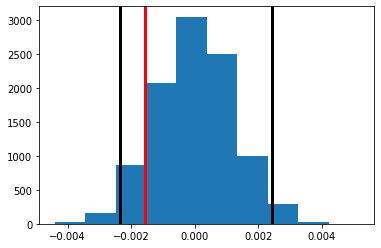

In [104]:
plt.hist(p_diffs);
plt.axvline(x=low, color='black', linewidth=3);
plt.axvline(x=upper, color='black', linewidth=3);
plt.axvline(x=obs_diff, color='red', linewidth=3);

> * The generated plot has a shape of a bell, which means, the sample means follows a normal distribution. 
Using a confidence interval of 95%,   most of the data points are in the region range, implying that The statistic is generated by the Null hypothesized value.

In [87]:
#observed difference in converted rate 
obs_diff = converted_treatment - converted_group
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [102]:
null_vals = np.random.normal(0, np.std(p_diffs), len(p_diffs))

In [103]:
print('Actual observed difference : ', obs_diff)
print('Proportion of p_diffs greater than observed (p-value): ', (null_vals > obs_diff).mean())

Actual observed difference :  -0.0015782389853555567
Proportion of p_diffs greater than observed (p-value):  0.9025


k. Please explain What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> * We've computed in the previous section The **P-Value** which is the most common method to test hypotheses instead of testing at preassigned levels of significance. 
> * **P-Value** is the smallest level of significance at which we can reject the null hypothesis, given the observed sample statistic.
> * In our case, **P-Value = 0.902**, and if we compare it to $\alpha$ **= 0.5** (95% confidence interval), the **P-Value > $\alpha$**, which leads us to conclude that most of our observed statistic is coming from the **Null**.
As a result, there's not enough **significative evidence** to reject the **Null hypothesis**.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [106]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page =="new_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page" '))
n_new = len(df2.query('landing_page == "new_page" '))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [120]:
z_score, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_val

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> * The **Z-score** is equal to **1.31** which is **less** than the critical value of **95% confidence interval** we set up earlier ( at 95% confidence,  **Z = 1.96**), therefore the **alternative hypothesis** cannot be accepted.
> * The **P-value** is equal to **0.905** which is **larger** than the **$\alpha$ = 0.05**, That implies the failure of the rejection of the **Null hypothesis**.
> * The results obtained using the built-in confirm the previous conclusions we made. 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> * Since we're trying to predict a categorical data with only 2 outcomes, the **logistic regression** is the best type of regression to use in this situation.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [126]:
#adding the intercept values
df2['intercept'] = 1
#creating dummy variables fro the caterogical data in column group 1 for treatement and 0 for control
df2[['x', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('x', axis=1, inplace= True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [150]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results1 = logit_mod.fit()
print(results1.summary())


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        00:45:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> * `ab_page` has a p_value of **0.190**, and the reason why this value is different from what we got previously is that, in part II, we stated that the **Null hypothesis** is the old page >= the new page, which is a one-tailed test, meanwhile, the logistic regression is a two-tailed test, which change our **Null hypothesis** to  $H_{0}$: $p_{old}$ - $p_{new}$ = 0 and the **Alternative hypothesis** to $H_{1}$: $p_{old}$ - $p_{new}$ != 0 . 
> * In this part (part III) we're analyzing the p-value to see if it is useful to predict the response or not; **Smaller** p-values (less than $\alpha$ = **0.05**) suggest that a specific variable is **statistically significant** in relating to the response variable, otherwise, if it's **larger** than it is not **statistically significant**.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Adding more factors into consideration to predict a result in a regression model will allow us to find out if these factors are significantly contributing and in correlation with the result or not (**example: Demography of the users**). However, including other factors seems to be helpful, but, we need to ensure that the factors chosen are related only to the predicted results and not to each other (Multicollinearity).

> Other drawbacks associated with adding more factors to the regression model :
> * Correlation of error terms
> * Outliers
> * Non-linearity of the response-variables relationship
> * Non-constant Variance 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [130]:
#loading the data up
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [133]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [136]:
#joining the two tables ab_data and countries 
df_join = df2.set_index('user_id').join(df_countries.set_index('user_id'), how='inner')
df_join.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [138]:
df_join['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [143]:
#adding the intercept values
df_join['intercept'] = 1
#creating dummy values for the column country
df_join[['CA','UK', 'US']] = pd.get_dummies(df_join['country'])

In [144]:
 #We chose US as a baseline so we can compare the other countries to it
logit_mod = sm.Logit(df_join['converted'], df_join[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        17:59:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.

In [145]:
#interpeting the results from the summary
np.exp(results.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [148]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

> the interpretation of the results compared to the US :
> * Canada is 1.04 times **less** likely to convert
> * Uinted Kingdom is 1.01 times **more** likely to convert

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  we will create the necessary additional columns, and fit the new model.  


> * In order to compute the interaction between page and country we will multiply the column of each country by the column `ab_page`.

In [154]:
df_join['CA_ab_page'] = df_join['CA'] * df_join['ab_page']
df_join['UK_ab_page'] = df_join['UK'] * df_join['ab_page']
df_join['US_ab_page'] = df_join['US'] * df_join['ab_page']

In [160]:
 #We chose US as a baseline so we can compare the other countries to it
logit_mod = sm.Logit(df_join['converted'], df_join[['intercept', 'CA_ab_page', 'UK_ab_page']])
results = logit_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:               3.351e-05
Time:                        01:54:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
CA_ab_page    -0.0644      0.

In [156]:
1/np.exp( -0.0752), np.exp(0.0149)

(1.0780997492739288, 1.0150115583846535)

> As results 
> * CA is 1.078 times **less** likely to convert than the US
> * UK is 1.015 times **more** likely to convert than the US


In [161]:
#We chose US as a baseline and we added ab_page to see how all these values are contributing in the predicted results
logit_mod = sm.Logit(df_join['converted'], df_join[['intercept', 'CA', 'UK', 'ab_page']])
results = logit_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        02:26:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.

> * It appears that there's no interaction between the new page and the countries since as shown in the table, all the values have a p-value **greater** than our **Type I error** $\alpha$ **= 0.5**, which lead us to conclude that the countries are insignificant to predict the conversion of users. 

In [162]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0